# Logistic regression

In this project, the goal is to determine whether a student is accepted or not based on two recorded scores

:Data Specifications

Input Data: Score of two exams

Output Data: Student passed (1) or failed (0)

In [23]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

#read data from project2-data1.csv file
data = pd.read_csv('/content/sample_data/project3data1.csv')
#show a summary of data
data.head()

,exam1,exam2,passed?
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [25]:
#split the data into input X and output Y
#input feature
X = data.values[:,0:2]
#output
Y = data.values[:,2]
#find m
m = Y.shape[0]

In [26]:
print(X.shape, Y.shape ,m)

(100, 2) (100,) 100


# Data Visualization:



In [27]:
import matplotlib.pyplot as plt
#function for plotting data
def plotData(X, y):
    # Find Indices of pos and neg examples

    pos = (y == 1)

    neg = (y == 0)

    #plot positive examples (y==1) using red stars
    plt.plot(X[pos,0], X[pos,1], 'r*', ms=10)


    #plot negetive examples (y==0) using red stars
    plt.plot(X[neg, 0], X[neg, 1], 'bo', ms=8)



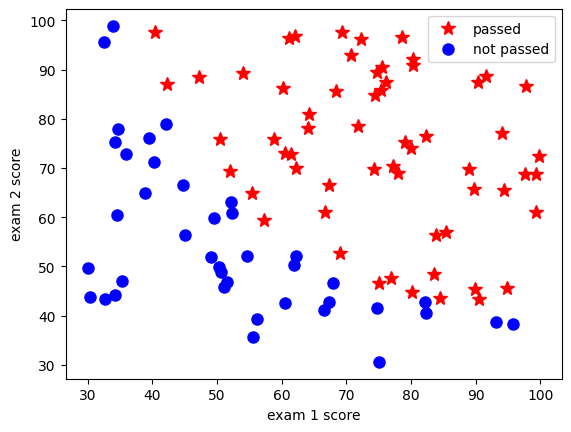

In [28]:
#Data visualization
#use plotData function
plotData(X, Y)
# use 'exam 1 score' for xlabel
plt.xlabel('exam 1 score')
# use 'exam 2 score' for ylabel
plt.ylabel('exam 2 score')
plt.legend(['passed', 'not passed'])


In [29]:
#print shapes of X and Y
print(X.shape,Y.shape)

(100, 2) (100,)


# creating X and Y matrices with the right dimensions as shown in the slide

<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [30]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
print(X.shape)

(2, 100)


In [31]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, axis=1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
print(Y.shape)

(1, 100)


In [32]:
#add x0=1 to all the data
ones_row = np.ones((1, X.shape[1]))
X = np.vstack((ones_row, X))


In [33]:
#check the shapes of X and Y after reshaping

print(X.shape,Y.shape)

(3, 100) (1, 100)


# **Cost Function: implementation**






---
# First method: simple implementation using for loop as shown inthe slide below



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1jK4vn47UYtZNT1Yqr53I3Otz272MjDbr">
</p>



---
# Second method: vectorized implementation



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1aEQiuNglUyi3rK_wF63BJoBK68oo4qVj">
</p>




In [34]:
#create a function for sigmoid g = 1/(1 + e^-x)
#use np.exp(-x)
def sigmoid(x):
  g = 1 / (1 + np.exp(-x));
  return g


In [35]:
#create a function for computing cost J
def computeCost(X, y, theta):
    m = y.shape[1]
    h = sigmoid(theta.T @ X)
    cost = -(1 / m) * (y @ np.log(h.T) + (1 - y) @ np.log(1 - h.T))
    return cost[0][0]

In [36]:
#initialize theta to [[0], [0], [0]]
theta = np.zeros((X.shape[0], 1))
#use the function you created to compute cost for initialized theta
print(X.shape,Y.shape)
computeCost(X, Y,theta)
#print cost

(3, 100) (1, 100)


np.float64(0.6931471805599453)

# **Gradient Descent: implementation**






---
# First method: simple implementation using for loop as shown in the slide below



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1xwUXHbSS5K68mrUSkCEiDhqjYDIbtusP">
</p>



---
# Second method: vectorized implementation



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1Eb3FNgaRyMfQXzFWToxmRp2TX5pqLCAt">
</p>




In [37]:
def gradientDescent(X, Y, theta, alpha, num_iters):
    m = Y.shape[1]
    for _ in range(num_iters):
        h = sigmoid(theta.T @ X)
        theta = theta - (alpha / m) * (X @ (h - Y).T)
        cost = computeCost(X, Y, theta)
    return theta, cost


In [38]:
#initialize theta and train logistic regression
theta = np.zeros((X.shape[0], 1))
#set epochs and learning rate
# Set learning rate and number of iterations
alpha = 0.001
num_iters =10000000
#run gradientDescent and print theta and last cost
theta, final_cost = gradientDescent(X, Y, theta, alpha, num_iters)
#print theta
print("Final cost:", final_cost)
print(theta)



Final cost: 0.20352489045758548
[[-24.73684959]
 [  0.2028365 ]
 [  0.19803678]]


In [39]:
#this function helps you plot the decision boundary
def plotDecisionBoundary(plotData, theta, X, y):

    #make sure theta is a numpy array
    theta = np.array(theta)


    #Plot Data (remember first column in X is the intercept)
    plotData(X, y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Passed', 'Not Passed', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(np.array([ui, vj], ndmin=2)), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)



In [40]:
print("shape of X is: ", X.shape)
print("shape of Y is: ", Y.shape)

shape of X is:  (3, 100)
shape of Y is:  (1, 100)


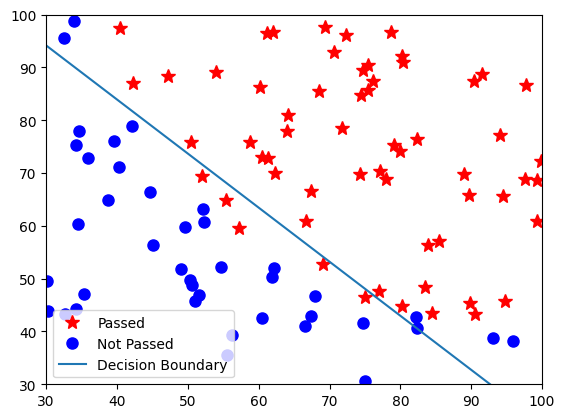

In [41]:
#convert X shape to (100, 2) (first delete x0 column then transpose)
#Convert Y shape to (100,) >> use indexing Y[0, :]
Y = Y[0,:]
X = np.delete(X, 0, axis=0)
X = np.transpose(X)
plotDecisionBoundary(plotData,theta,X,Y)

# Predict

In [42]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
#add x0=1 to all the data
ones_row = np.ones((1, X.shape[1]))
X = np.vstack((ones_row, X))
print(X)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.     

In [43]:

#h(x) = sigmoid()
#create a predict function that returns probability and class(use threshold 0.5)
def predict(X,theta):
  print (theta.T.shape ,X.shape)
  h = sigmoid(theta.T @ X)
  prediction_class = (h >= 0.5).astype(int)
  prediction_prob = h
  return prediction_prob, prediction_class

In [44]:
#call the predict function and print the output of model for all data X
prediction_prob, prediction_class = predict(X,theta)

#print prediction_prob
print('\n  prediction_prob : \n\n',prediction_prob)
#print prediction_class
print('\n  prediction_class : \n\n',prediction_class)
#print real classes >> Y
print('\n  Y : \n\n',Y)

(1, 3) (3, 100)

  prediction_prob : 

 [[9.43066590e-02 5.01332830e-05 4.61605284e-02 9.89673338e-01
  9.98004437e-01 1.16629972e-02 9.98854336e-01 4.25634304e-01
  9.99668400e-01 7.33102585e-01 9.06986585e-01 3.04492991e-02
  9.99179083e-01 9.99830877e-01 1.59903495e-01 9.79703189e-01
  4.29877619e-01 1.53076488e-01 9.99664272e-01 5.74209828e-01
  6.99305363e-02 9.98473985e-01 8.07157411e-03 1.18286541e-04
  9.91233952e-01 8.51642305e-01 5.99882895e-01 8.62250279e-01
  9.59663294e-02 1.80191330e-02 8.93951038e-01 9.79859875e-01
  1.58977182e-01 3.94154527e-01 7.71647898e-02 3.50741726e-02
  8.48416635e-01 9.86657360e-01 2.08532505e-01 5.19894879e-02
  9.68710479e-01 6.68075173e-03 9.99392026e-01 5.03612123e-01
  4.92780297e-03 1.41143033e-01 9.92415465e-01 9.99995310e-01
  9.99104846e-01 9.99988816e-01 9.97904578e-01 9.99435663e-01
  9.02231105e-01 3.09977548e-03 9.25051709e-03 5.54886319e-02
  9.99834500e-01 6.90620946e-01 9.84500526e-01 9.95334037e-01
  9.99468754e-01 2.56597075e-0

# Logistic Regression with regularization



In this project, we want to use the values ​​of two tests performed on microchips

to determine whether the quality of the chips is acceptable (1) or not (0)

:Data specifications

Input data: Results of test 1 and test 2

Output data: Acceptable quality (1) or unacceptable quality (0)

In [45]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd;
#import numpy
import numpy as np;



#read data from project2-data1.csv file
data = pd.read_csv('/content/sample_data/project3data2.csv')

#show a summary of data
data.head()

,test1,test2,Quality
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [46]:
#split the data into input X and output Y
#input feature
X = data.values[:,0:2]
#output
Y = data.values[:,2]
#find m
m = Y.shape[0]


In [47]:
print(X.shape, Y.shape)

(118, 2) (118,)


# Data Visualization:


In [48]:
#function for plotting data
import matplotlib.pyplot as plt
def plotData(X, y):
    #Find Indices of pos and neg examples
    pos = (y == 1)

    neg = (y == 0)

    #plot positive examples (y==1) using red stars
    plt.plot(X[pos,0], X[pos,1], 'r*', ms=10)


    #plot negetive examples (y==0) using red stars
    #رسم داده های با خروجی 0 با دایره های آبی رنگ
    plt.plot(X[neg, 0], X[neg, 1], 'bo', ms=8)



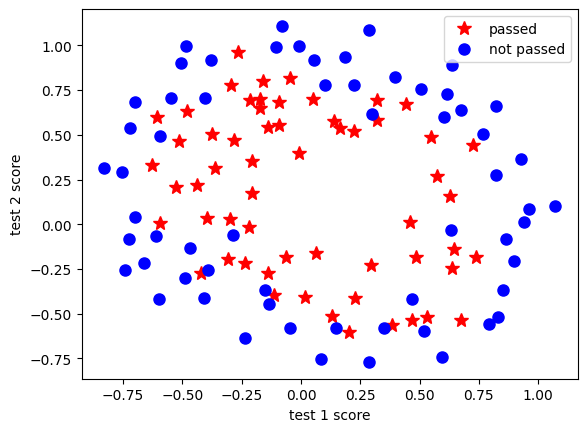

In [49]:
#Data visualization
plotData(X, Y)

plt.xlabel('test 1 score')
plt.ylabel('test 2 score')
plt.legend(['passed', 'not passed'])


as you saw above, the classes can not be separated using a line


we need a non-linear decision boundary


so we first must create new features using the mapFeature function


<p align="center" width="100%">
    <img width="70%" src="https://drive.google.com/uc?id=1_gi7UyIuIQePo13IsdqtSi-idXZvctTo">
</p>

In [50]:
#with the function below u can create polynomial features
#keep in mind that this function adds x0 so we dont need to do it later

def mapFeature(X, degree=6):
    X1 = X[:,0]
    X2 = X[:,1]
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [51]:
#call mapFeature with degree=6 to create new features
X = mapFeature(X, 6)
print(X.shape)

(118, 28)


In [52]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (118, 28)
shape of Y: (118,)


# creating X and Y matrices with the right dimensions as shown in the slide


<p align="center" width="100%">
    <img width="50%" src="https://drive.google.com/uc?id=1wlGw9Mm6WJge83NeAtrn6jokvE6iShfU">
</p>

In [53]:
#Convert dimension X from (m, n) to (n, m)
X = X.T
print(X.shape)

(28, 118)


In [54]:
#convert Y dimension from (m,) to (m, 1)
Y = np.expand_dims(Y, axis=1)
#Convert dimension Y from (m, 1) to (1, m)
Y = np.transpose(Y)
print(Y.shape)

(1, 118)


# **Cost Function with Regularization: implementation**






---
# First method: simple implementation using for loop as shown inthe slide below



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1dTN9GmNaKcM5ZIScH2P_vVLjG77t5sjg">
</p>



---
# Second method: vectorized implementation



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1ytdvFMQoWl1dsG88eeERv5d0UxMre4AN">
</p>




In [55]:
#create a function for sigmoid g = 1/(1 + e^-x)
def sigmoid(x):
  g = 1/(1 + np.exp(-x))
  return g

In [56]:
#create a function for computing cost J
def computeCostWithReg(X,Y,theta,lambda_):
  #find m
  m = Y.shape[1]
  # print('\n m: \n',m)
  # compute h using sigmoid function and thetatemp and X
  h = sigmoid(theta.T @ X)
  # print('\n h: \n' , h)
  #use h and compute cost
  #use np.log() for logarithm
  #use np.transpose() for transpose
  #np.matmul() for matrix multiplication
  costWithReg = -(1 / m) * ( np.log(h) @ Y.T + np.log(1-h) @ (1-Y).T ) + (lambda_ / (2 * m)) * ((theta[1:]).T @ theta[1:])
  return costWithReg.item()


In [57]:
#initialize theta to a zero vector of shape (X.shape[0],1)>>> np.zeros((X.shape[0],1))
theta = np.zeros((X.shape[0],1))
print('\n X : \n',X.shape)
print('\n Y : \n',Y.shape)
# use the function you created to compute cost for initialized theta
costWithReg = computeCostWithReg(X, Y, theta, lambda_=1)
print("initial cost is:", costWithReg)


 X : 
 (28, 118)

 Y : 
 (1, 118)
initial cost is: 0.6931471805599454


# **Gradient Descent with Regularization: implementation**






---
# First method: simple implementation using for loop as shown in the slide below



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1906OIZGT-MUITqOD34_93Y7eg1ZHutjP">
</p>



---
# Second method: vectorized implementation



<p align="center" width="100%">
    <img width="80%" src="https://drive.google.com/uc?id=1v7z__YImgydKcngc4hnFdEsEbKBUO1L6">
</p>




In [58]:
#create a function for vectorized gradient descent with regularization
#
def gradientDescentWithReg(X, Y, thetatemp, lr, epochs, lambda_):
    # Find m (number of training examples)
    m = Y.shape[1]

    # Create a list to store cost of each epoch
    J_history = []

    # Training loop
    for _ in range(epochs):
        # Calculate hypothesis (h)
        h = sigmoid(thetatemp.T @ X)

        # Calculate gradient with regularization
        # Note: We don't regularize theta_0 (the intercept)
        gradient = (1 / m) * (X @ (h - Y).T)
        gradient[1:] = gradient[1:] + (lambda_ / m) * thetatemp[1:]

        # Update thetatemp
        thetatemp = thetatemp - lr * gradient

        # Calculate and store cost
        cost = computeCostWithReg(X, Y, thetatemp, lambda_)
        J_history.append(cost)

    return thetatemp, J_history

In [59]:
# Initialize theta to a zero vector of shape (X.shape[0], 1)
theta = np.zeros((X.shape[0], 1))

# Set learning rate, number of iterations, and regularization parameter
alpha = 1
num_iters = 1000000
lambda_ = 0.001

# Run gradientDescentWithReg and get updated theta and cost history
theta_new, J_history = gradientDescentWithReg(X, Y, theta, alpha, num_iters, lambda_)

# Print the final theta and last cost
# print("Final theta:", theta_new)
print("Final cost:", J_history[-1])


Final cost: 0.3052098890652206


In [61]:
#this function helps you plot the decision boundary
def plotDecisionBoundary(plotData, theta, X, y):

    #make sure theta is a numpy array
    theta = np.array(theta)


    #Plot Data (remember first column in X is the intercept)
    plotData(X, y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Passed', 'Not Passed', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(np.array([ui, vj], ndmin=2)), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)



In [62]:
print("shape of X is: ", X.shape)
print("shape of Y is: ", Y.shape)

shape of X is:  (28, 118)
shape of Y is:  (1, 118)


In [63]:
#convert X shape to (100, 2) (first delete x0 column then transpose)
#Convert Y shape to (100,) >> use indexing Y[0, :]
Y = Y[0,:]
X = np.delete(X, 0, axis=0)
X = np.transpose(X)

Y: 
 (118,)
X: 
 (118, 27)
theta_new: 
 (28, 1)


<ipython-input-61-ebaec40db1e1>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(mapFeature(np.array([ui, vj], ndmin=2)), theta)


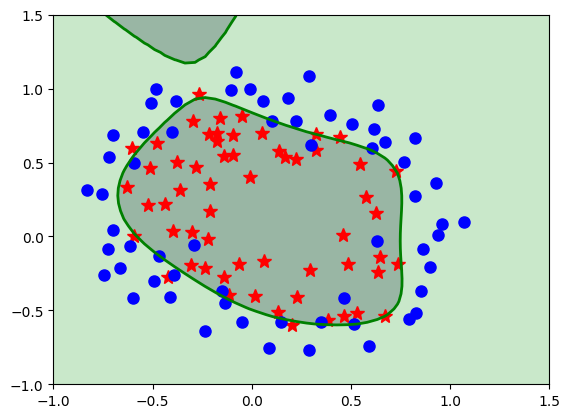

In [64]:
print('Y: \n',Y.shape)
print('X: \n',X.shape)
print('theta_new: \n',theta_new.shape)
#train you model with different parameters of lr and epochs and lamba_ to find a model with a good decision boundary
plotDecisionBoundary(plotData, theta_new, X, Y)

# Predict

In [65]:
#Convert dimension X from (m, n) to (n, m)
X = np.transpose(X)
#add x0=1 to all the data
ones_row = np.ones((1, X.shape[1]))
X = np.vstack((ones_row, X))
print(X)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 5.12670000e-02 -9.27420000e-02 -2.13710000e-01 ... -4.84450000e-01
  -6.33640000e-03  6.32650000e-01]
 [ 6.99560000e-01  6.84940000e-01  6.92250000e-01 ...  9.99270000e-01
   9.99270000e-01 -3.06120000e-02]
 ...
 [ 6.29470940e-04  1.89305413e-03  1.04882142e-02 ...  2.34007252e-01
   4.00328554e-05  3.51474517e-07]
 [ 8.58939846e-03 -1.39810280e-02 -3.39734512e-02 ... -4.82684337e-01
  -6.31330588e-03 -1.70067777e-08]
 [ 1.17205992e-01  1.03255971e-01  1.10046893e-01 ...  9.95627986e-01
   9.95627986e-01  8.22905998e-10]]


In [66]:
#h(x) = sigmoid()
#create a predict function that returns probability and class(use threshold 0.5)
def predict(thetatemp, X):
  print (theta.shape ,X.shape)
  h = sigmoid(theta.T @ X)
  prediction_class = (h >= 0.5).astype(int)
  prediction_prob = h
  return prediction_prob, prediction_class


In [68]:
#call the predict function and print the output of model for all data X
prediction_prob, prediction_class = predict(theta_new, X)

#print prediction_prob

#print prediction_class
#print real classes >> Y
print(Y)

(28, 1) (28, 118)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Use scikit learn for logistic regression

In [69]:
#load data set from a csv file
#import pandas libaray for reading a csv file
import pandas as pd

#read data from project2-data2.csv file
data2 = pd.read_csv("/content/sample_data/project3data2.csv")

#show a summary of data
data2.head()

,test1,test2,Quality
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [70]:
#split the data into input X and output Y
#input feature
X = data2.values[:, 0:2]

#output
Y = data2.values[:, 2]

#find m
m = Y.shape[0]


In [71]:
#with the function below u can create polynomial features
#keep in mind that this function adds x0 so we dont need to do it later

def mapFeature(X, degree=6):
    X1 = X[:,0]
    X2 = X[:,1]
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [72]:
#call mapFeature with degree=6 to create new features
X = mapFeature(X, 6)
print(X.shape)

(118, 28)


In [73]:
#print shapes of X and Y
print("shape of X:", X.shape)
print("shape of Y:", Y.shape)


shape of X: (118, 28)
shape of Y: (118,)


In [74]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [75]:
#predict for input test1=0.2 and test2= 0.8
test1 = 0.25
test2 = 0.25
model.predict(mapFeature(np.array([test1, test2], ndmin=2)))

array([1.])